In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers.core import Dropout, Activation
from keras.layers import Conv2D,BatchNormalization,MaxPool2D,Flatten,Dense
from sklearn.utils.class_weight import compute_class_weight
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Input, Activation, Dropout, GlobalAveragePooling2D, \
    BatchNormalization, concatenate, AveragePooling2D
from keras.optimizers import Adam
import time
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

Data Preprocessing

In [2]:
X_small_test = np.load() # path for Minor test image data 
Y_small_test = np.load() # path for Minor test class data
print('shape of X',X_small_test.shape)
print('shape of Y',Y_small_test.shape)


shape of X (1041, 76, 76, 3)
shape of Y (1041,)


In [3]:
X_big_test = np.load() # path for Major test image data 
Y_big_test = np.load() # path for Major test image data 
print('shape of X',X_big_test.shape)
print('shape of Y',Y_big_test.shape)

shape of X (5779, 76, 76, 3)
shape of Y (5779, 5)


In [4]:
model_large = tf.keras.models.load_model() # path for saved Major Category model
model_large.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 10245     
Total params: 23,597,957
Trainable params: 23,544,837
Non-trainable params: 53,120
_________________________________________________________________


In [5]:
model_small = tf.keras.models.load_model() # path for saved Minor Category CNN model
model_small.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 76, 76, 16)        448       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 74, 74, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 37, 37, 32)        9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 35, 35, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20736)            

In [6]:
model_small.evaluate(X_small_test, Y_small_test)

33/33 [==============================] - 3s 63ms/step - loss: 0.4605 - accuracy: 0.9299


[0.46045759320259094, 0.9298751354217529]

In [8]:
model_large.evaluate(X_big_test, Y_big_test)

181/181 [==============================] - 71s 383ms/step - loss: 0.4740 - accuracy: 0.8507


[0.4739588797092438, 0.8506662249565125]

In [7]:
Y_small_pred = model_small.predict(X_small_test)
print(np.argmax(Y_small_pred, axis=1))

[1 1 0 ... 2 3 0]


In [8]:
Y_big_pred = model_large.predict(X_big_test)
print(Y_big_pred)

[[2.4220583e-07 5.5566838e-06 2.9871787e-04 9.9969542e-01 6.4482291e-09]
 [9.8204631e-01 1.0277235e-02 3.1770859e-03 2.4397467e-08 4.4992752e-03]
 [3.2629247e-11 1.4233026e-07 4.4689888e-05 9.9995518e-01 3.0252203e-08]
 ...
 [2.5320153e-08 9.6370280e-01 6.9529771e-05 3.6205087e-02 2.2630844e-05]
 [2.3937505e-03 9.7096980e-01 1.3616844e-02 2.5718950e-03 1.0447747e-02]
 [3.6052860e-02 2.5911128e-05 2.9633584e-04 2.5870708e-07 9.6362466e-01]]


In [9]:
print(np.argmax(Y_big_pred, axis=1))

[3 0 3 ... 1 1 4]


In [10]:
X_total = np.concatenate([X_big_test, X_small_test])

In [ ]:
for i in X_total:
    print(i.shape)

In [13]:
np.argmax(model_large.predict(np.expand_dims(X_total[0], axis=0)),axis=1)[0]

3

In [14]:
Y_result=[]
for i in X_total:
    preds_big=np.argmax(model_large.predict(np.expand_dims(i, axis=0)), axis=1)
    if preds_big[0] == 4:
        preds_small=np.argmax(model_small.predict(np.expand_dims(i, axis=0)),axis=1)
        if preds_small[0] == 0:
            Y_result.append(4)
        elif preds_small[0] == 1:
            Y_result.append(5)
        elif preds_small[0] == 2:
            Y_result.append(6)
        elif preds_small[0] == 3:
            Y_result.append(7)
    else:
        Y_result.append(preds_big[0])

print(Y_result)
        
        

[3, 0, 3, 2, 0, 0, 3, 2, 2, 2, 3, 1, 2, 2, 3, 1, 0, 0, 2, 5, 0, 2, 0, 2, 2, 2, 0, 2, 1, 3, 1, 6, 0, 3, 5, 0, 7, 1, 3, 0, 1, 4, 2, 1, 3, 1, 1, 0, 3, 3, 3, 5, 2, 1, 2, 3, 0, 0, 0, 0, 0, 1, 3, 2, 3, 3, 3, 1, 0, 2, 4, 1, 7, 6, 2, 0, 1, 0, 1, 0, 1, 0, 3, 3, 2, 1, 2, 1, 0, 7, 0, 1, 2, 2, 2, 2, 2, 3, 3, 1, 6, 2, 2, 3, 0, 3, 0, 0, 2, 3, 0, 7, 1, 5, 0, 0, 0, 2, 2, 2, 3, 2, 2, 6, 3, 0, 2, 0, 2, 3, 1, 0, 0, 2, 2, 3, 1, 0, 6, 1, 2, 1, 1, 3, 3, 2, 3, 6, 6, 0, 1, 7, 3, 1, 1, 0, 3, 1, 2, 1, 3, 1, 2, 2, 0, 2, 5, 3, 2, 1, 1, 2, 1, 0, 6, 1, 0, 0, 0, 3, 1, 3, 7, 3, 1, 0, 0, 2, 1, 1, 5, 3, 4, 0, 1, 1, 2, 3, 0, 1, 1, 0, 2, 3, 3, 5, 2, 1, 1, 6, 3, 2, 2, 0, 3, 3, 5, 1, 2, 1, 0, 0, 2, 6, 0, 3, 3, 0, 2, 3, 1, 3, 4, 1, 3, 0, 1, 1, 7, 3, 2, 0, 0, 3, 0, 5, 3, 2, 0, 2, 3, 0, 1, 3, 0, 1, 1, 4, 3, 2, 3, 0, 0, 0, 2, 2, 3, 2, 1, 2, 0, 2, 3, 3, 5, 0, 2, 2, 2, 6, 2, 2, 2, 0, 3, 3, 1, 2, 2, 3, 0, 3, 5, 1, 0, 6, 1, 0, 6, 5, 3, 3, 7, 0, 0, 3, 0, 2, 0, 1, 1, 2, 3, 1, 3, 5, 0, 2, 1, 3, 1, 3, 0, 3, 6, 2, 2, 2, 3, 0, 3, 2, 3, 

In [35]:
len(Y_result)

6820

In [16]:
Y_big_test

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [17]:
X_big_new=[]
Y_big_new=[]
Y_big_test_2=np.argmax(Y_big_test, axis=1)

In [19]:
for i in range(len(Y_big_test)):
    if Y_big_test_2[i]!=4:
        X_big_new.append(X_big_test[i])
        Y_big_new.append(Y_big_test_2[i])

In [24]:
X_big_new=np.array(X_big_new)
print(X_big_new.shape)

(4925, 76, 76, 3)


In [25]:
Y_big_new = np.array(Y_big_new)

In [28]:
for i in range(len(Y_small_test)):
    Y_small_test[i]+=4

In [30]:
X_total_new = np.concatenate([X_big_new, X_small_test])

In [31]:
Y_total_new = np.concatenate([Y_big_new, Y_small_test])

In [33]:
X_total_new.shape

(5966, 76, 76, 3)

In [34]:
Y_total_new.shape

(5966,)

In [40]:
Y_result_2=[]
for i in X_total_new:
    preds_big=np.argmax(model_large.predict(np.expand_dims(i, axis=0)), axis=1)
    if preds_big[0] == 4:
        preds_small=np.argmax(model_small.predict(np.expand_dims(i, axis=0)),axis=1)
        if preds_small[0] == 0:
            Y_result_2.append(4)
        elif preds_small[0] == 1:
            Y_result_2.append(5)
        elif preds_small[0] == 2:
            Y_result_2.append(6)
        elif preds_small[0] == 3:
            Y_result_2.append(7)
    else:
        Y_result_2.append(preds_big[0])

print(Y_result_2)
        

[3, 0, 3, 2, 0, 0, 3, 2, 2, 2, 3, 1, 2, 2, 3, 1, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 1, 3, 1, 0, 3, 0, 1, 3, 0, 1, 2, 1, 3, 1, 1, 0, 3, 3, 3, 2, 1, 2, 3, 0, 0, 0, 0, 0, 1, 3, 2, 3, 3, 3, 1, 0, 2, 1, 2, 0, 1, 0, 1, 0, 1, 0, 3, 3, 2, 1, 2, 1, 0, 7, 1, 2, 2, 2, 2, 2, 3, 3, 1, 2, 2, 3, 0, 3, 0, 0, 2, 3, 7, 0, 0, 2, 2, 2, 3, 2, 2, 3, 0, 2, 0, 2, 3, 1, 0, 0, 2, 2, 3, 0, 1, 2, 1, 1, 3, 3, 2, 3, 6, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 2, 2, 0, 2, 3, 2, 1, 1, 2, 1, 0, 1, 0, 0, 0, 3, 1, 3, 3, 1, 0, 0, 2, 1, 1, 3, 0, 1, 1, 2, 3, 0, 1, 1, 0, 2, 3, 3, 2, 1, 1, 6, 3, 2, 2, 0, 3, 3, 1, 2, 1, 0, 0, 2, 0, 3, 3, 0, 2, 3, 1, 3, 1, 3, 0, 1, 3, 2, 0, 0, 3, 0, 3, 2, 0, 2, 3, 0, 1, 3, 0, 1, 1, 4, 3, 2, 3, 0, 0, 0, 2, 2, 3, 2, 1, 2, 0, 2, 3, 3, 5, 0, 2, 2, 2, 2, 2, 2, 0, 3, 3, 1, 2, 2, 3, 0, 3, 1, 0, 1, 0, 5, 3, 3, 0, 0, 3, 0, 2, 0, 1, 1, 2, 3, 1, 3, 5, 0, 2, 1, 3, 1, 3, 0, 3, 2, 2, 2, 3, 0, 3, 2, 3, 5, 3, 2, 1, 3, 0, 3, 0, 1, 0, 6, 3, 0, 3, 3, 0, 1, 3, 3, 3, 3, 1, 2, 0, 0, 2, 0, 2, 2, 0, 3, 3, 0, 3, 1, 0, 2, 0, 1, 2, 

In [41]:
len(Y_result_2)

5966

In [42]:
from sklearn import metrics

In [97]:
labels = ["bcc", "bkl", "mel", "nv", "df", "akiec", "scc", "vasc"]

In [101]:
cm = metrics.confusion_matrix(Y_total_new, Y_result_2)

In [102]:
print(cm)

[[1128   76   46    8   22   29   17    3]
 [  54  863   75   36    3   16    1    2]
 [  32   93  995   53    7   13    5    7]
 [   5   26   60 1239    4    2    2    3]
 [  36   19   15    3  175    0    5    1]
 [  72   38   12    0   10  114    4    2]
 [  62   29   10    0    7   11  151    0]
 [  23    5    4    2    1    1    0  229]]


In [58]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

print("Recall:",(TPR.sum()/8))
print("Specificity:",(TNR.sum()/8))
print("Precision:",(PPV.sum()/8))

Recall: 0.7481367826453814
Specificity: 0.972589044676847
Precision: 0.8014891786951162


In [59]:
c_acc=0
for i in range(len(Y_total_new)):
    if Y_total_new[i]==Y_result_2[i]:
        c_acc+=1
print(c_acc/len(Y_total_new))

0.8203151190077104


In [103]:
metrics.f1_score(Y_total_new, Y_result_2, average='micro')

0.8203151190077104

In [104]:
metrics.precision_score(Y_total_new, Y_result_2, average='micro')

0.8203151190077104

In [105]:
metrics.accuracy_score(Y_total_new, Y_result_2)

0.8203151190077104

In [106]:
print(metrics.classification_report(Y_total_new, Y_result_2))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1329
           1       0.75      0.82      0.78      1050
           2       0.82      0.83      0.82      1205
           3       0.92      0.92      0.92      1341
           4       0.76      0.69      0.72       254
           5       0.61      0.45      0.52       252
           6       0.82      0.56      0.66       270
           7       0.93      0.86      0.89       265

    accuracy                           0.82      5966
   macro avg       0.80      0.75      0.77      5966
weighted avg       0.82      0.82      0.82      5966



In [107]:
metrics.balanced_accuracy_score(Y_total_new, Y_result_2)

0.7481367826453814

In [92]:
metrics.jaccard_score(Y_total_new, Y_result_2, average='weighted')

0.7007723214530414

In [95]:
import matplotlib.pyplot as plt

In [111]:
# Path to save predicted and actual class values

np.save( , Y_total_new)
np.save( , Y_result_2)


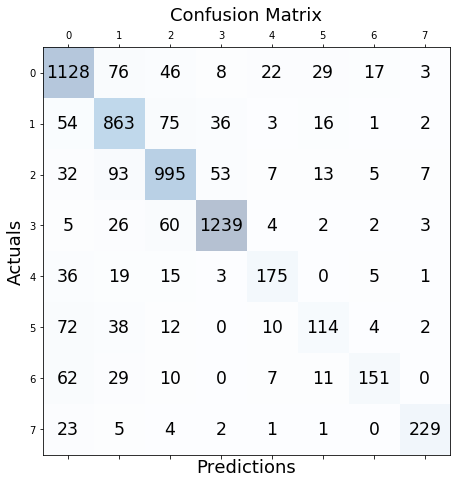

In [96]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

y_true_labels = ["bcc", "bkl", "mel", "nv", "df", "akiec", "scc", "vasc"]
y_pred_labels = ["bcc", "bkl", "mel", "nv", "df", "akiec", "scc", "vasc"]
data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
<matplotlib.axe